**Loading**

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

def load_dataset(file_path, column_names, separator=':::', engine_type='python'):
    try:
        data = pd.read_csv(file_path, sep=separator, names=column_names, engine=engine_type)
        print(f"Successfully loaded data from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# File paths
train_file = "/content/drive/My Drive/Genre Classification Dataset/train_data.txt"
test_file = "/content/drive/My Drive/Genre Classification Dataset/test_data.txt"
solution_file = "/content/drive/My Drive/Genre Classification Dataset/test_data_solution.txt"

# Load the datasets with the  function
training_data = load_dataset(train_file, ["title", "genre", "description"])
testing_data = load_dataset(test_file, ["title", "description"])
testing_solution_data = load_dataset(solution_file, ["title", "genre", "description"])

Mounted at /content/drive
Successfully loaded data from /content/drive/My Drive/Genre Classification Dataset/train_data.txt
Successfully loaded data from /content/drive/My Drive/Genre Classification Dataset/test_data.txt
Successfully loaded data from /content/drive/My Drive/Genre Classification Dataset/test_data_solution.txt


**Visualizaion**

In [ ]:
training_data.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
testing_data.head()

,title,description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
testing_solution_data.head()

,title,genre,description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
training_data.describe()

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
training_data.genre.value_counts()

,count
genre,
drama,13613
documentary,13096
comedy,7447
short,5073
horror,2204
thriller,1591
action,1315
western,1032
reality-tv,884


<ipython-input-14-b2cef1d7955b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


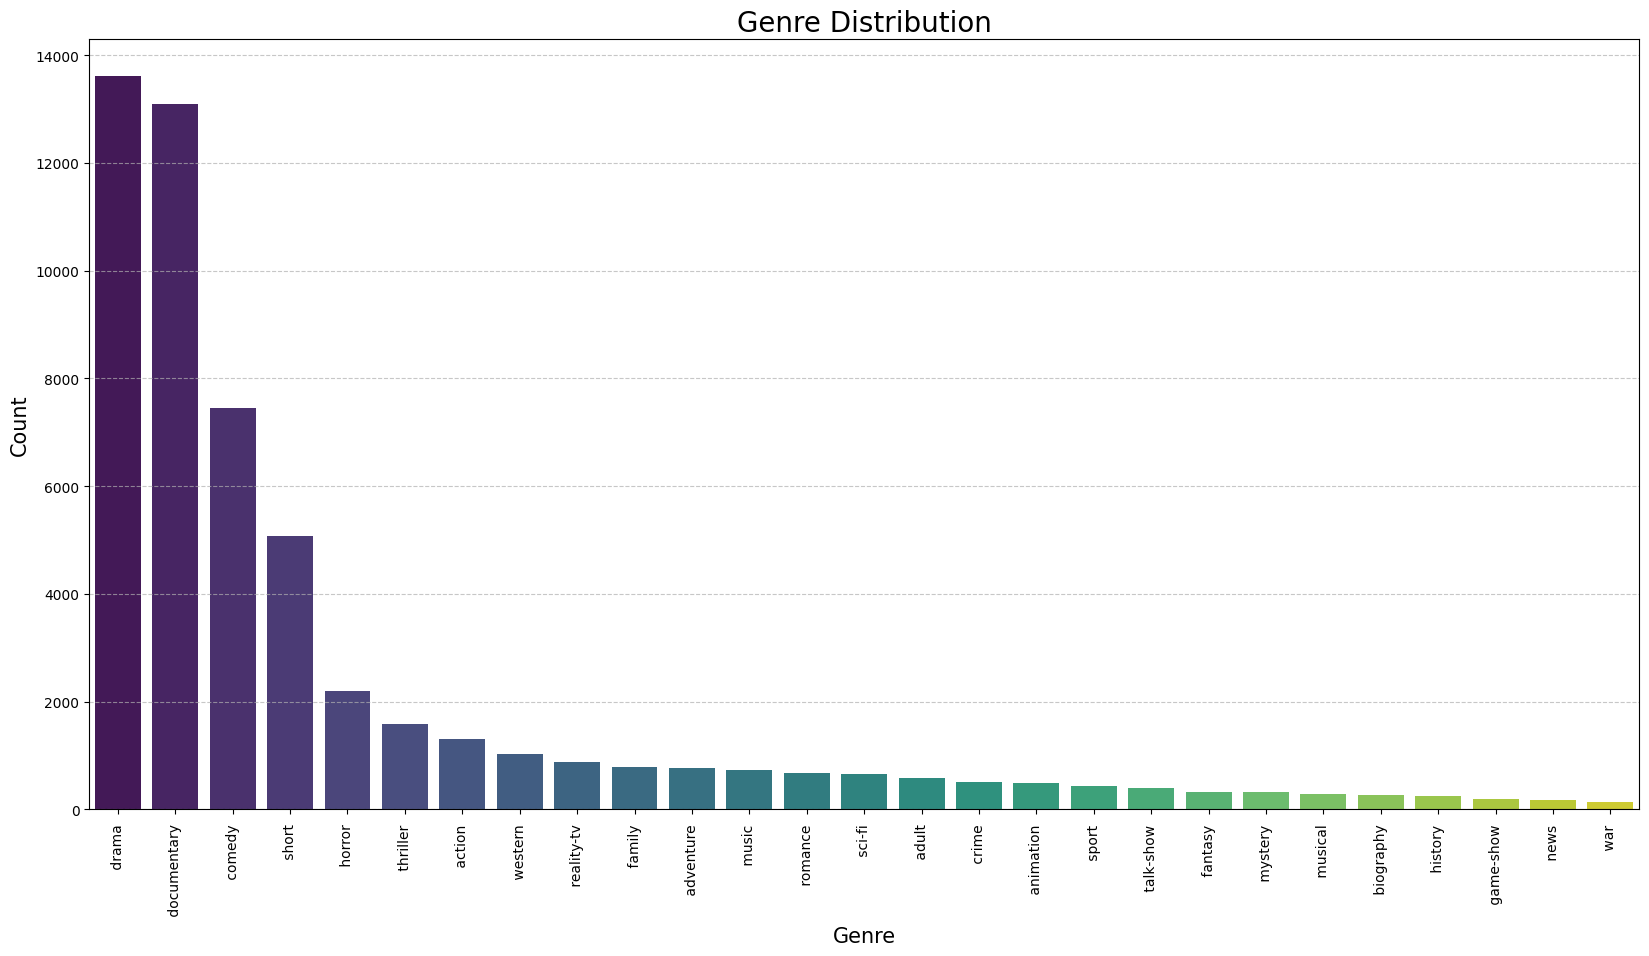

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
genre_counts = training_data['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Distribution', fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Preprocessing**

In [ ]:
def display_dataset_info(df):
    print("Dataset Information:")
    df.info()
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    print("\nMissing Values:")
    print(df.isnull().sum())

display_dataset_info(training_data)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB

Summary Statistics:
                                 title    genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  

Missing Values:
title          0
genre          0
des

**Cleaning**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load stop words
stop_words_set = set(stopwords.words('english'))

def clean_text(input_text):

    # Convert text to lowercase
    cleaned_text = input_text.lower()

    # Remove mentions (e.g., @usernames)
    cleaned_text = re.sub(r'@\S+', '', cleaned_text)

    # Remove URLs
    cleaned_text = re.sub(r'http\S+', '', cleaned_text)

    # Remove email addresses
    cleaned_text = re.sub(r'[\w\.-]+@[\w\.-]+', '', cleaned_text)

    # Keep only English characters; remove numbers and special characters
    cleaned_text = re.sub(r"[^a-zA-Z\s']", ' ', cleaned_text)

    # Remove single characters
    cleaned_text = re.sub(r'\s+[a-zA-Z]\s+', ' ', cleaned_text + ' ')

    # Remove picture references
    cleaned_text = re.sub(r'pic.\S+', '', cleaned_text)

    # Remove hashtags
    cleaned_text = re.sub(r'#', '', cleaned_text)

    # Replace underscores with spaces
    cleaned_text = re.sub(r'_', ' ', cleaned_text)

    # Replace new lines with a period
    cleaned_text = re.sub(r'\n', ' . ', cleaned_text)

    # Remove square brackets and their content
    cleaned_text = re.sub(r'\[[^]]*\]', '', cleaned_text)

    # Remove punctuation
    cleaned_text = "".join(char for char in cleaned_text if char not in string.punctuation)

    # Remove extra spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    # Tokenize the text
    tokens = word_tokenize(cleaned_text)

    # Remove stop words and short words (length <= 2)
    cleaned_text = " ".join(word for word in tokens if word not in stop_words_set and len(word) > 2)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
training_data['cleaned_description'] = training_data['description'].apply(clean_text)
testing_data['cleaned_description'] = testing_data['description'].apply(clean_text)

**Stemming function**

In [ ]:
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()

def apply_stemming(text_series):
    return text_series.apply(lambda text: ' '.join(porter_stemmer.stem(word) for word in text.split()))

training_data['stemmed_description'] = apply_stemming(training_data['cleaned_description'])
testing_data['stemmed_description'] = apply_stemming(testing_data['cleaned_description'])


In [ ]:
training_data.head()

,title,genre,description,cleaned_description,stemmed_description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...,listen convers doctor parent year old oscar le...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,brother sister past incestu relationship curre...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,bu empti student field trip museum natur histo...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,help unemploy father make end meet edith twin ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...,film titl refer recov bodi ground zero also st...


**Extract Top bigrams**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def extract_top_n_bigrams(text_data, top_n=None):
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bigram_matrix = vectorizer.fit_transform(text_data)
    bigram_counts = bigram_matrix.sum(axis=0)
    bigram_freq = [(bigram, bigram_counts[0, idx]) for bigram, idx in vectorizer.vocabulary_.items()]
    sorted_bigrams = sorted(bigram_freq, key=lambda x: x[1], reverse=True)
    return sorted_bigrams[:top_n]
top_bigrams = extract_top_n_bigrams(training_data['cleaned_description'], top_n=10)
bigrams_df = pd.DataFrame(top_bigrams, columns=['bigram', 'frequency'])

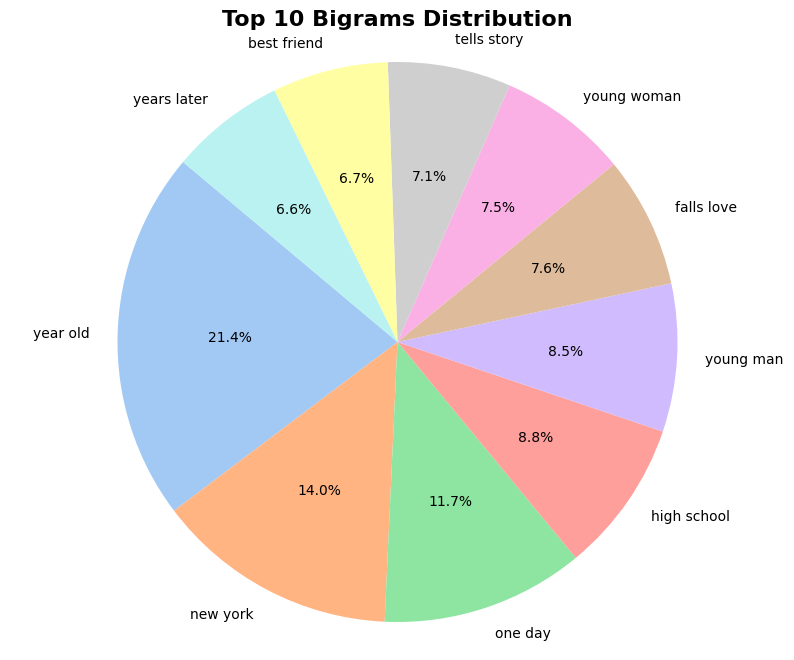

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(bigrams_df['frequency'], labels=bigrams_df['bigram'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Top 10 Bigrams Distribution", fontweight='bold', fontsize=16)
plt.axis('equal')
plt.show()

**Label Encodeing of the Target variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
training_data['genre'] = le.fit_transform(training_data['genre'])

train_df = training_data[['cleaned_description', 'genre']]
test_df = testing_data[['cleaned_description', 'title']]

train_df.head(50)


,cleaned_description,genre
1,listening conversation doctor parents year old...,8
2,brother sister past incestuous relationship cu...,24
3,bus empties students field trip museum natural...,1
4,help unemployed father make ends meet edith tw...,8
5,films title refers recovered bodies ground zer...,8
6,quality control consists series single take sh...,7
7,tough economic times max joey run ideas discov...,5
8,ron petrie keanu reeves troubled teen whose li...,6
9,sudden calamitous event causing great loss lif...,18
10,four high school students embark terrifying jo...,13


**Splitting Data into Training and Validation Sets**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train_df['cleaned_description'],
    training_data['genre'],
    test_size=0.2,
    shuffle=True,
    random_state=42
)
print('Data has been split into training and validation sets:')
print(f'Training Set Size   : {len(X_train)} samples')
print(f'Validation Set Size : {len(X_val)} samples')


Data has been split into training and validation sets:
Training Set Size   : 43371 samples
Validation Set Size : 10843 samples




```
# This is formatted as code
```

**Text Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
print(f"TF-IDF vectorized training set shape: {X_train_tfidf.shape}")
print(f"TF-IDF vectorized validation set shape: {X_val_tfidf.shape}")


TF-IDF vectorized training set shape: (43371, 100000)
TF-IDF vectorized validation set shape: (10843, 100000)


**Training the Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)
val_predictions = logreg_model.predict(X_val_tfidf)
print("Classification Report for Logistic Regression:\n", classification_report(y_val, val_predictions))
logreg_accuracy = accuracy_score(y_val, val_predictions)
print('Logistic Regression Model Accuracy: {:.2f}%'.format(logreg_accuracy * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.54      0.21      0.31       263
           1       0.83      0.18      0.29       112
           2       0.45      0.11      0.17       139
           3       0.67      0.02      0.04       104
           4       0.00      0.00      0.00        61
           5       0.52      0.58      0.55      1443
           6       0.50      0.02      0.04       107
           7       0.64      0.86      0.74      2659
           8       0.53      0.81      0.64      2697
           9       0.44      0.05      0.10       150
          10       0.00      0.00      0.00        74
          11       0.92      0.30      0.45        40
          12       0.00      0.00      0.00        45
          13       0.68      0.55      0.61       431
          14       0.68      0.36      0.47       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Decoding Predicted Movie Genres**

In [ ]:
test_set_tfidf = tfidf_vectorizer.transform(testing_data['cleaned_description'])
predicted_genres = logreg_model.predict(test_set_tfidf)
decoded_predicted_genres = le.inverse_transform(predicted_genres)

**Extracting Actual Genres from Solution Data**

In [ ]:
actual_genres = testing_solution_data['genre'].iloc[:len(predicted_genres)].values


**Constructing Predictions Summary DataFrame**

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.colheader_justify', 'center')

predictions_df = pd.DataFrame({
    'Title': testing_data['title'].iloc[:len(predicted_genres)].values,
    'Actual Genre': actual_genres,
    'Predicted Genre': decoded_predicted_genres
})

print(predictions_df.head(50))


                       Title                      Actual Genre  Predicted Genre
0                          Edgar's Lunch (1998)       thriller          comedy 
1                      La guerra de papá (1977)         comedy           drama 
2                   Off the Beaten Track (2010)    documentary     documentary 
3                        Meu Amigo Hindu (2015)          drama           drama 
4                             Er nu zhai (1955)          drama           drama 
5                            Riddle Room (2016)         horror           drama 
6                                L'amica (1969)          drama           drama 
7                          Ina Mina Dika (1989)         comedy          comedy 
8    Equinox Special: Britain's Tornados (2005)    documentary     documentary 
9                                  Press (2011)          drama           drama 
10                          The Firm Man (1975)          drama           drama 
11                         Out of Here (